In [ ]:
#playing around with multisets to spread out weight of each profile over events/nodes


In [7]:
import datasketch 
import numpy as np
import time
import ete3


In [8]:
from datasketch import WeightedMinHashGenerator

v1 = 1000 *[.5]
v2 = 1000 * [1]

# WeightedMinHashGenerator requires dimension as the first argument
wmg = WeightedMinHashGenerator(1000, sample_size=512, seed=0)

wm1 = wmg.minhash(v1) # wm1 is of the type WeightedMinHash
wm2 = wmg.minhash(v2)

print("Estimated Jaccard is", wm1.jaccard(wm2))



('Estimated Jaccard is', 0.482421875)


In [9]:
#each hog has 4000 taxonomic elements
#total weight is defined as 1 

#spread out the hog over its taxonomic range 
#give more weight to certain events/levels

#score over the HOG -> normalize

import numpy as np




In [11]:
from ete3 import Tree
mastertree = Tree( 'mastertree.nwk' , format = 1 )  
print(len(mastertree))
treeindex = { n.name : i for i,n in enumerate(mastertree.traverse())}
print(len(treeindex))

2103
2997


In [5]:
#assign a weight to each taxonomic level. decrese exponentially or linearly?
#exp should be tuned for each event type

#todo sep functions for 3 kingdoms... 
exp_bact = .9
exp_euk = .9
exp_arch = .9

for node in mastertree.traverse():
    node.add_feature('degree', 1 )
for node in mastertree.iter_descendants():
    for d in node.iter_descendants():
        d.degree+=1
degreedict = {n.name : n.degree for n in mastertree.traverse()}        
print(degreedict)

{'': 1, '477974': 7, '2065118': 8, '65093': 7, '460265': 6, '429572': 8, '13735': 15, '89373': 6, '374930': 7, '374931': 7, '77166': 15, '507522': 8, '929556': 6, '929557': 6, '351348': 7, '161': 7, '443149': 10, '340': 7, '407976': 7, '443143': 7, '953739': 7, '32524': 12, '32523': 11, '443144': 7, '680646': 8, '7375': 17, '354276': 7, '340102': 8, '340100': 7, '765698': 7, '214092': 9, '652620': 8, '759364': 6, '1198451': 5, '869209': 6, '759362': 7, '759363': 6, '1093141': 3, '4734': 8, '1054460': 8, '57723': 2, '441772': 10, '441771': 10, '441770': 10, '6296': 10, '294': 8, '1005048': 6, '4641': 9, '663917': 8, '1643826': 5, '1643824': 6, '63737': 6, '448385': 6, '43988': 6, '32011': 5, '274': 5, '868131': 6, '670386': 4, '148305': 12, '766764': 8, '998088': 6, '130081': 4, '1201294': 7, '315277': 6, '471854': 7, '349519': 8, '665079': 12, '552526': 11, '2263': 4, '2260': 4, '2266': 5, '2267': 6, '357804': 5, '485917': 6, '485916': 8, '485915': 6, '485914': 6, '334390': 9, '9526': 

In [6]:
import pyham
import xml.etree.cElementTree as ET

#generate hap2 treemap with ncbi master tree. 
def switch_name_ncbi_id(orthoxml):
    root = ET.fromstring(orthoxml)
    for child in root:
        if 'species' in child.tag:
            child.attrib['name'] = child.attrib['NCBITaxId']

    orthoxml = ET.tostring(root, method='xml')

    return orthoxml

with open('./testdata/hap2OMA.oxml', 'r') as orthofile:
    ortho = orthofile.read()

ortho = switch_name_ncbi_id(ortho)
with open( './testdata/hap2OMA_switch.oxml', 'w')as orthout:
    orthout.write(ortho)


treestr = mastertree.write(format = 1)
ham_obj = pyham.Ham(treestr, './testdata/hap2OMA_switch.oxml', type_hog_file="orthoxml", use_internal_name=True )
fam = 395297
hog = ham_obj.get_hog_by_id(fam)
tp = ham_obj.create_tree_profile(hog=hog)

print(tp.treemap.features)
    

set([u'identical', 'dist', 'name', u'lost', 'support', u'nbr_genes', u'gain', u'dupl'])


In [7]:
for n in tp.treemap.traverse():
    if n.lost:
        if n.lost >0:
            print(n)
            print(n.lost)


   /-46433
--|
   \-753081
1

            /-4790
           |
         /-|--4792
        |  |
      /-|   \-403677
     |  |
   /-|   \-559515
  |  |
  |   \-695850
  |
  |   /-296543
  |--|
  |   \-556484
--|
  |--12968
  |
  |--44056
  |
  |--2880
  |
   \-1093141
1

   /-184922
--|
   \-598745
1

--280463
1

--905079
1

      /-3055
   /-|
  |   \-3067
  |
  |      /-70448
  |   /-|
--|  |   \-436017
  |--|
  |  |   /-296587
  |   \-|
  |      \-564608
  |
   \-554065
1

   /-5759
  |
--|--370354
  |
   \-1076696
1

                     /-5334
                    |
                    |--5346
                  /-|
                 |  |--29883
               /-|  |
              |  |   \-192523
              |  |
              |   \-741705
              |
              |         /-82310
              |      /-|
              |     |   \-5306
              |     |
              |     |   /-717944
            /-|     |--|
           |  |   /-|   \-732165
           |  |  |  |
        

In [9]:
from ete3 import Tree,   TreeStyle, NodeStyle , TextFace , RectFace


def layout(node):
    # If node is a leaf, add the nodes name and a its scientific name
        if node.lost:
            if node.lost >0:
                #add n hits
                faces.add_face_to_node(  RectFace( 10 * node.dupl, 10, 'red', 'red' ), node , column = 1  )

circular_style = TreeStyle()
circular_style.mode = "c" # draw tree in circular mode
circular_style.layout_fn = layout
circular_style.show_leaf_name = False

ImportError: cannot import name TreeStyle

In [9]:

#add an exponential bleed function for events gain, dup, loss
#bleedup, bleeddown should be diff for each event type

bleedup = .1
bleeddown = .1
#assign score to nodes

#blur scores up and down

#init all scores that are None to 0
feature_names = ['lost','gain','dupl','nbr_genes']
for n in tp.treemap.traverse():
    for i,e in enumerate([n.lost,n.gain, n.dupl,  n.nbr_genes ]):
        if e:
            pass
        else:
            n.add_feature(feature_names[i], 0)
            

exps_up = [.1,.1,.1,.1]
exps_down = [.1,.1,.1,.1]

#exponential decay of scores up and down
for n in tp.treemap.traverse():
    for i,e in enumerate([n.lost,n.gain, n.dupl,  n.nbr_genes ]):
        if e:
            if e >0:
                for a in n.iter_ancestors():
                    events = [a.lost,n.gain, a.dupl,a.nbr_genes ]
                    if events[i]:
                        events[i] += e ** (exps_up[i]*degreedict[n.name])
                        
                        
                        #print(events[i])
                        #print(a.name)
                        #print([a.lost,n.gain, a.dupl,a.nbr_genes ])

tp.treemap.render('%%inline', tree_style=circular_style)

#after a treeprofile is distributed to it taxonomic nodes, normalize
vector = np.asarray([ n.lost for n in tp.treemap.traverse() if n.lost is not None ]) 
print(vector)
#vector /= np.sum(vector)
#turn into weighted minhash



NameError: name 'circular_style' is not defined

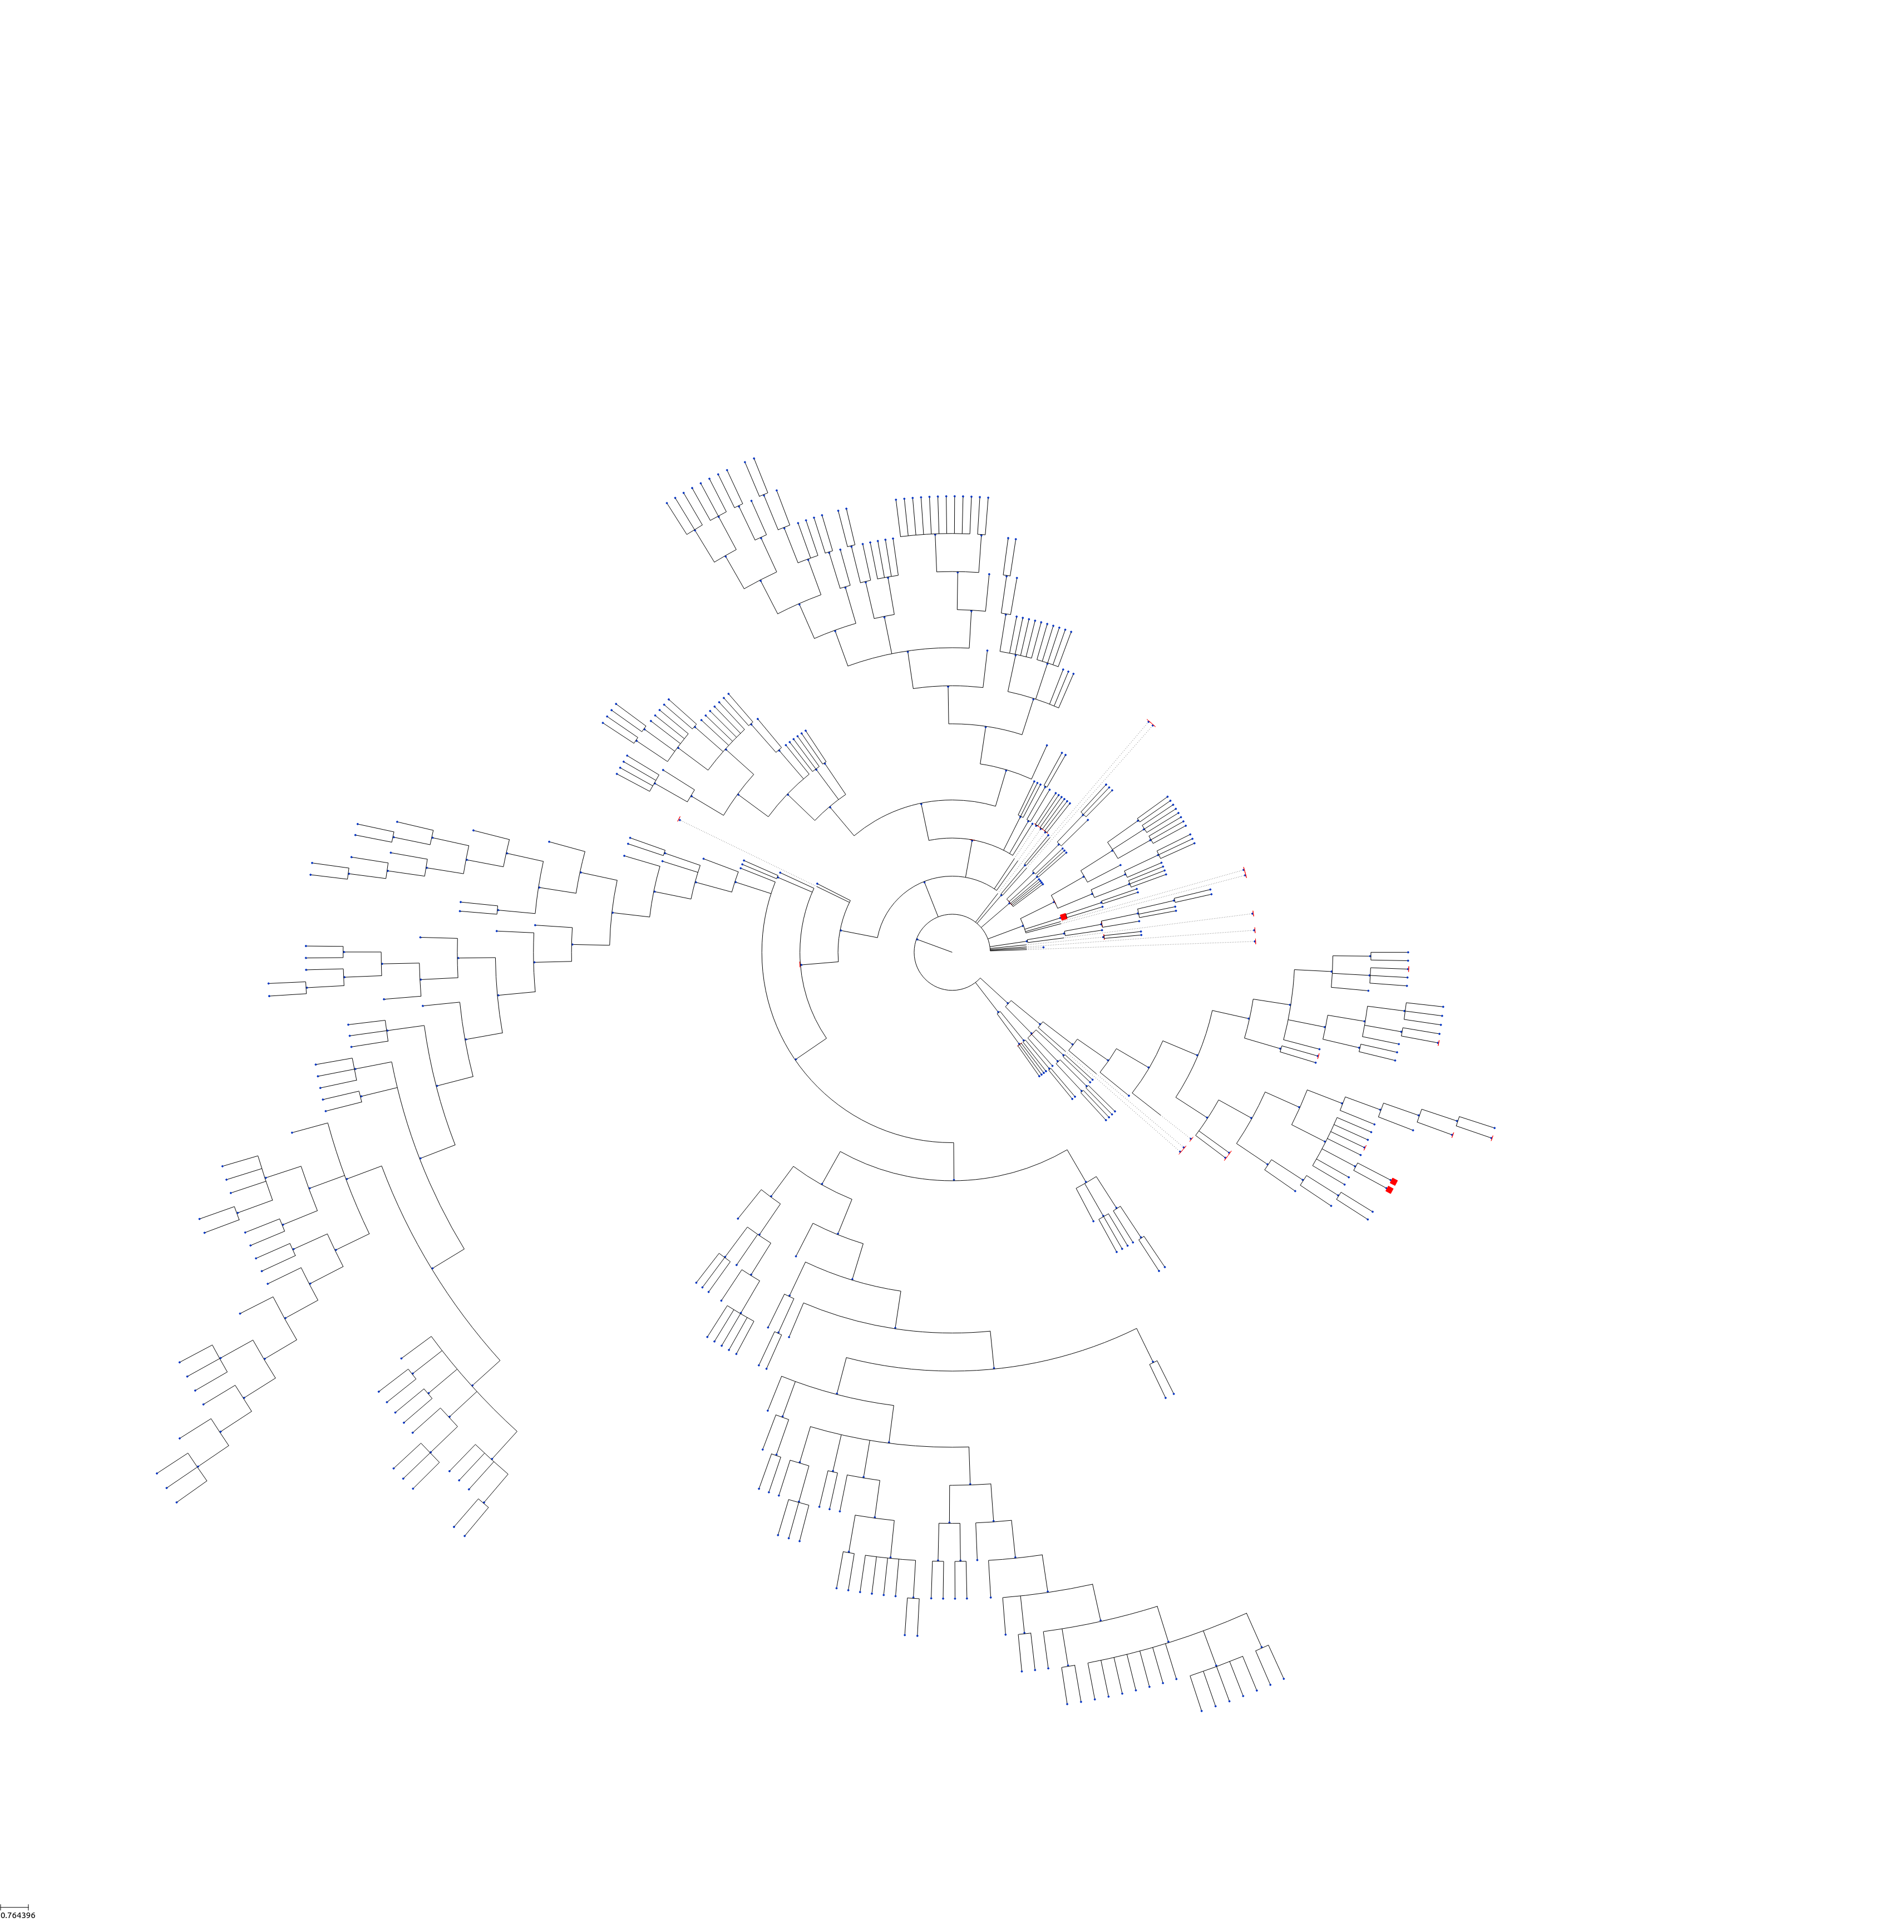

In [55]:
tp.treemap.render('%%inline', tree_style=circular_style)

